In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
df=pd.read_csv("Downloads/Kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [26]:
df['classification']=df['classification'].map({'ckd':1,"notckd":0})
df['rbc']=df['rbc'].map({'normal':1, 'abnormal':0})
df['pc']=df['pc'].map({'normal':1, 'abnormal':0})
df['pcc']=df['pcc'].map({'present':1, 'notpresent':0})
df['ba']=df['ba'].map({'present':1, 'notpresent':0})
df['htn']=df['htn'].map({'yes':1,'no':0})
df['dm']=df['dm'].map({'yes':1,'no':0})
df['cad']=df['cad'].map({'yes':1,'no':0})
df['pe']=df['pe'].map({'yes':1,'no':0})
df['ane']=df['ane'].map({'yes':1,'no':0})
df['appet']=df['appet'].map({'good':1,'poor':0})

df=df.dropna()
df['classification']=df['classification'].astype(int)

X=df.drop('classification',axis=1).values
y=df['classification'].values


C:\Users\HP\AppData\Local\Temp\ipykernel_13744\3557497972.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classification']=df['classification'].astype(int)


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion matrix:",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 1.0
Confusion matrix: [[23  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



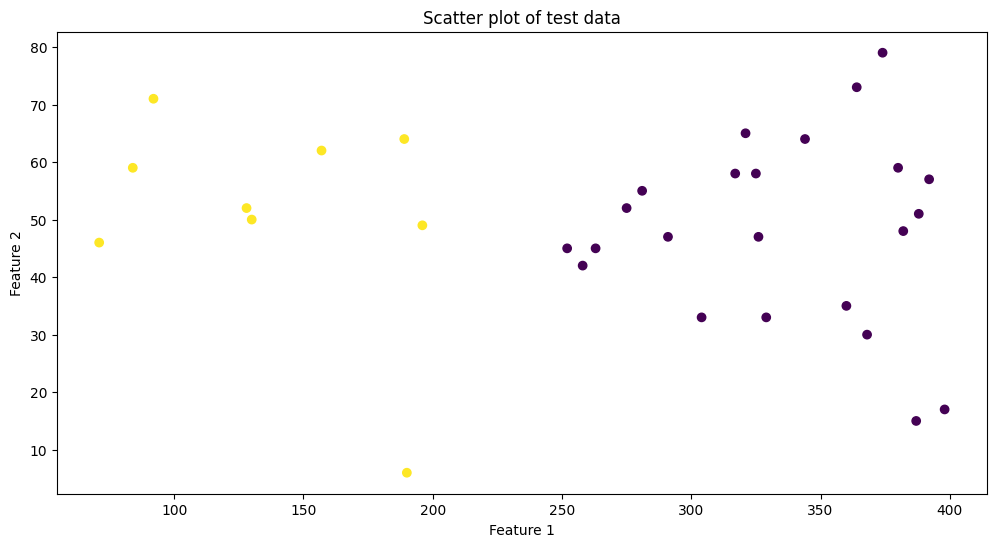

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of test data')
plt.show()

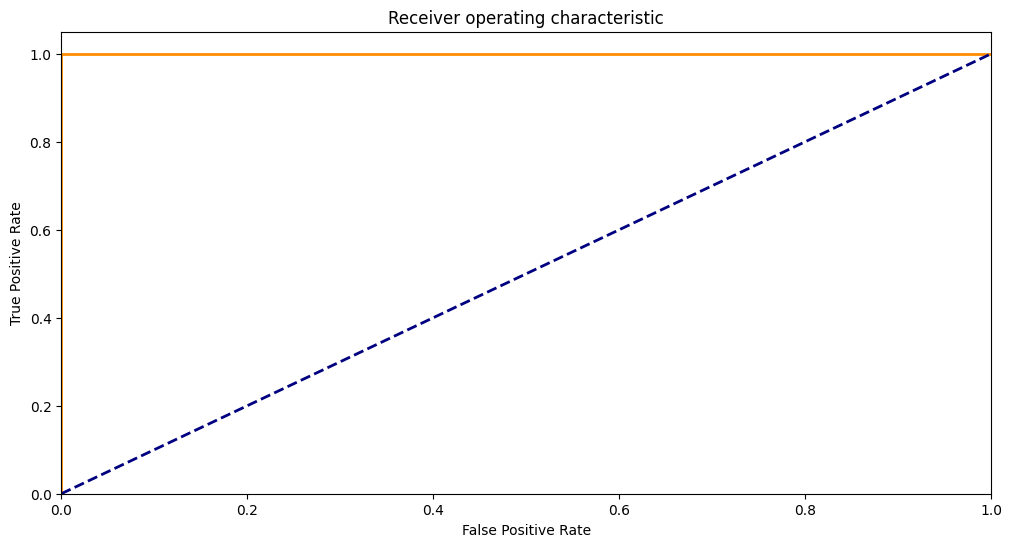

In [31]:
from sklearn.metrics import roc_curve, auc
y_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(12,6))
plt.plot(fpr,tpr, color='darkorange', lw=2)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

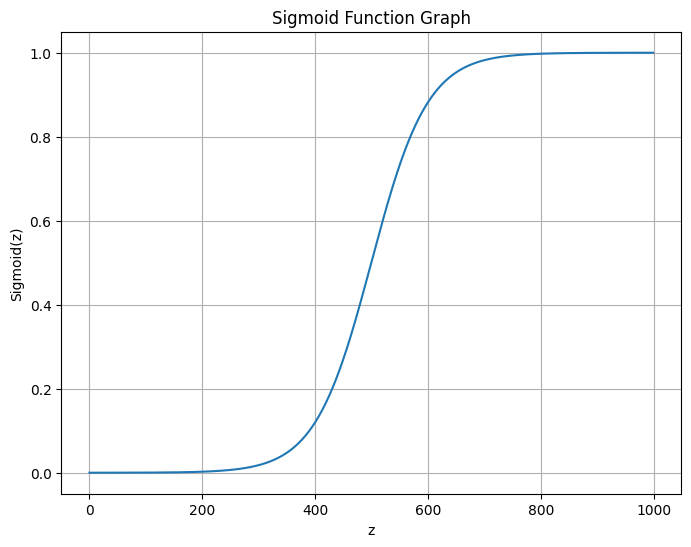

In [48]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


z=np.linspace(-10,10,100)


plt.figure(figsize=(8,6))
plt.plot(sigmoid_values, label='sigmoid FUnction')

sigmoid_values=sigmoid(z)

plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function Graph')
plt.grid(True)
plt.show()